In [1]:
import arcgis
from arcgis import *
from arcgis.mapping import MapImageLayer
import time 
from IPython import display
import arcpy
# from bokeh.io import push_notebook, show, output_notebook
# from bokeh.plotting import figure
# output_notebook()
import os
import warnings

warnings.filterwarnings('ignore')

In [3]:
gis = GIS("https://www.arcgis.com",'rcmartinb')

Enter password: ········


<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>
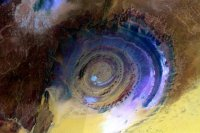

In [4]:
landsat_item=gis.content.search('title:Multispectral Landsat','Imagery Layer',outside_org=True)[0]
landsat_item

In [5]:
landsat=landsat_item.layers[0]
# landsat

In [6]:
aoi = {'spatialReference': {'latestWkid': 4326}, 'type': 'extent', 
       'xmax': -73.8552, 'xmin': -74.0050, 'ymax': 1.4864, 'ymin': 1.3628}

arcgis.env.analysis_extent = aoi

landsat.extent = aoi

In [67]:
import pandas as pd
from datetime import datetime

selected = landsat.filter_by(where="(Category = 1)",
                             time=[datetime(2016, 1, 15), datetime(2019, 3, 1)],
                             geometry=arcgis.geometry.filters.intersects(aoi))

df = selected.query(out_fields="AcquisitionDate, GroupName, CloudCover, DayOfYear,dataset_id", 
                    order_by_fields="AcquisitionDate").sdf
df['AcquisitionDate'] = pd.to_datetime(df['AcquisitionDate'], unit='ms')
df.tail(10)

,AcquisitionDate,CloudCover,DayOfYear,GroupName,OBJECTID,SHAPE,Shape_Area,Shape_Length,dataset_id
60,2018-10-04 15:07:08,0.7860,277,LC80070592018277LGN00_MTL,2356352,"{""rings"": [[[-8078174.6702, 236099.96649999917...",3.489899e+10,747613.331952,Landsat8
61,2018-10-20 15:07:14,0.8604,293,LC80070592018293LGN00_MTL,2362837,"{""rings"": [[[-8079307.6427, 236081.22069999948...",3.487041e+10,747344.957087,Landsat8
62,2018-11-05 15:07:17,0.3098,309,LC80070592018309LGN00_MTL,2375641,"{""rings"": [[[-8079606.366800001, 236042.425900...",3.487766e+10,747386.895585,Landsat8
63,2018-11-21 15:07:18,0.9999,325,LC80070592018325LGN00_MTL,2381033,"{""rings"": [[[-8078779.2162999995, 236080.74980...",3.486095e+10,747211.034743,Landsat8
64,2018-12-07 15:07:15,0.2126,341,LC80070592018341LGN00_MTL,2388115,"{""rings"": [[[-8077274.9034, 236211.63269999996...",3.487291e+10,747335.872183,Landsat8
65,2018-12-23 15:07:15,0.4828,357,LC80070592018357LGN00_MTL,2395835,"{""rings"": [[[-8076676.9549, 236151.87779999897...",3.488432e+10,747468.809894,Landsat8
66,2019-01-08 15:07:13,0.4103,8,LC80070592019008LGN00_MTL,98204,"{""rings"": [[[-8076561.032500001, 236210.416600...",3.487597e+10,747586.268174,Landsat8
67,2019-01-24 15:07:09,0.8726,24,LC80070592019024LGN00_MTL,98221,"{""rings"": [[[-8114234.9679000005, 56038.122000...",3.486233e+10,747453.078814,Landsat8
68,2019-02-09 15:07:07,0.5766,40,LC80070592019040LGN00_MTL,2407193,"{""rings"": [[[-8076005.6592999995, 236150.57389...",3.489326e+10,747553.941855,Landsat8
69,2019-02-25 15:07:04,0.0056,56,LC80070592019056LGN00_MTL,3006243,"{""rings"": [[[-8076075.8233, 236150.37099999934...",3.490195e+10,747642.924013,Landsat8


In [11]:
df.head()

,AcquisitionDate,CloudCover,DayOfYear,GroupName,OBJECTID,SHAPE,Shape_Area,Shape_Length,dataset_id
0,2016-01-16 15:07:27,0.2056,16,LC80070592016016LGN02_MTL,2727491,"{""rings"": [[[-8078058.593, 236058.8440000005],...",3.488116e+10,747423.396849,Landsat8
1,2016-02-01 15:07:25,0.0000,32,LC80070592016032LGN02_MTL,2737304,"{""rings"": [[[-8078703.115800001, 236175.530499...",3.488137e+10,747425.668092,Landsat8
2,2016-02-17 15:07:16,0.8608,48,LC80070592016048LGN00_MTL,1966465,"{""rings"": [[[-8073663.1775, 235920.4226000011]...",3.574392e+10,756416.670394,Landsat8
3,2016-03-04 15:07:15,0.3019,64,LC80070592016064LGN00_MTL,1966466,"{""rings"": [[[-8078293.350299999, 236391.348299...",3.496841e+10,748384.401337,Landsat8
4,2016-03-20 15:07:09,0.8223,80,LC80070592016080LGN00_MTL,1966467,"{""rings"": [[[-8075763.8017, 235922.32119999826...",3.573171e+10,756285.562916,Landsat8


In [7]:
raster2019 = landsat.filter_by("GroupName='LC80070592019056LGN00_MTL'") #02 2019
raster2016 = landsat.filter_by("GroupName='LC80070592016016LGN02_MTL'") #01 2016

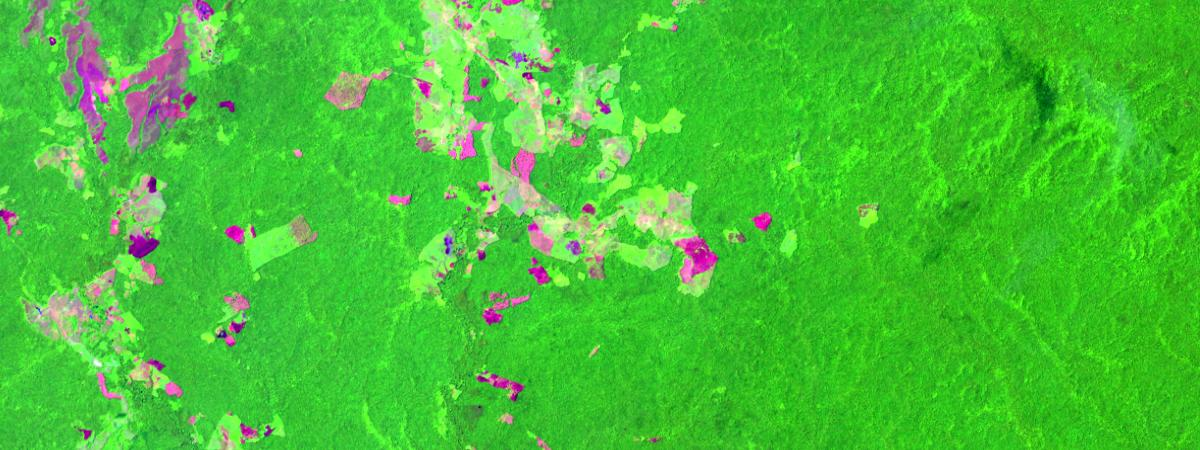

In [8]:
from arcgis.raster.functions import *
extract_band(raster2019, [6,5,4])

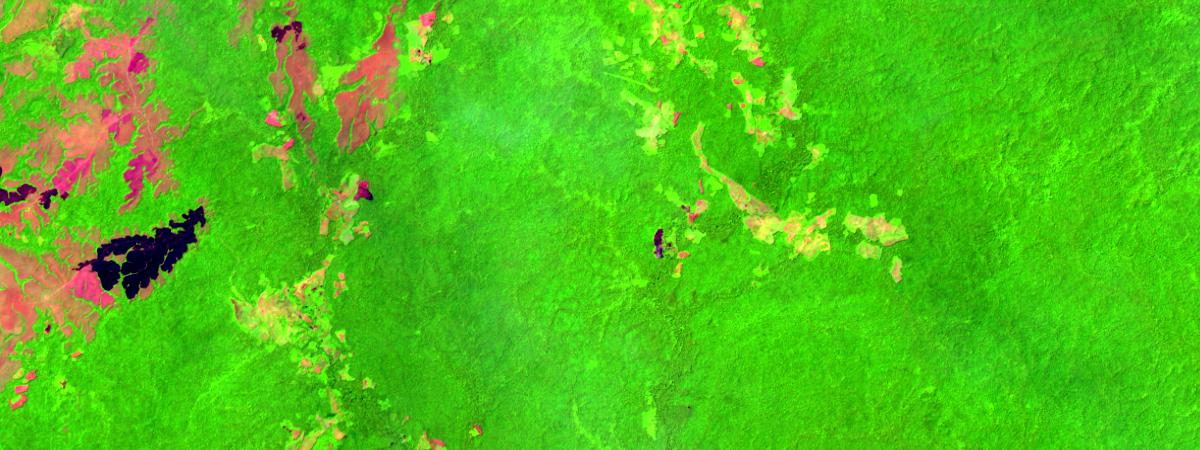

In [16]:
extract_band(raster2016, [6,5,4])

In [9]:
clip2016=clip(raster2016, aoi)
clip2019= clip(raster2019,aoi)

In [11]:
for fn in clip2019.properties.rasterFunctionInfos:
    print(fn['name'])

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Geology with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
Band 10 Surface Temperature in Fahrenheit
Band 11 Surface Temperature in Fahrenheit
Band 10 Surface Temperature in Celsius
Band 11 Surface Temperature in Celsius
None


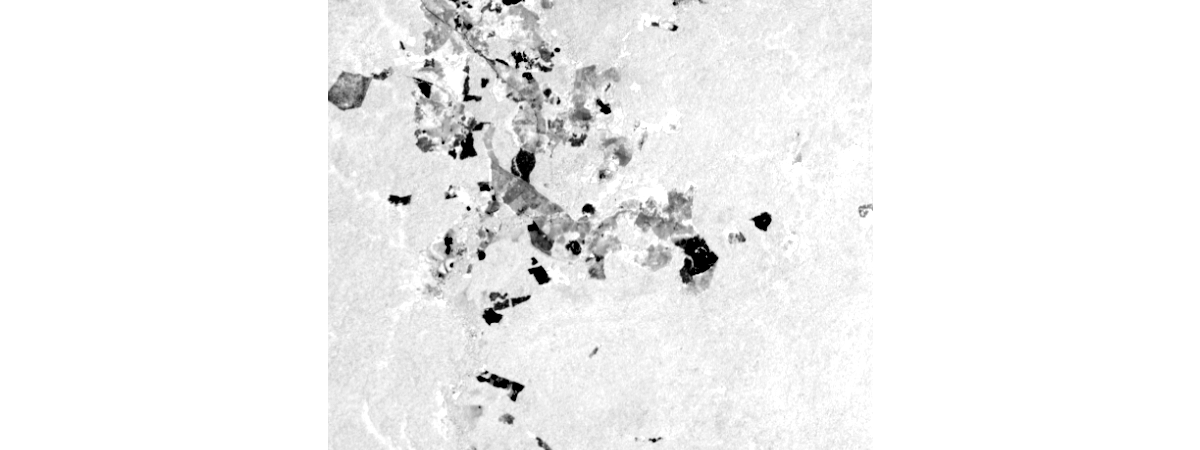

In [12]:
ndvi2019 = apply(clip2019, 'NDVI Raw')
ndvi2019

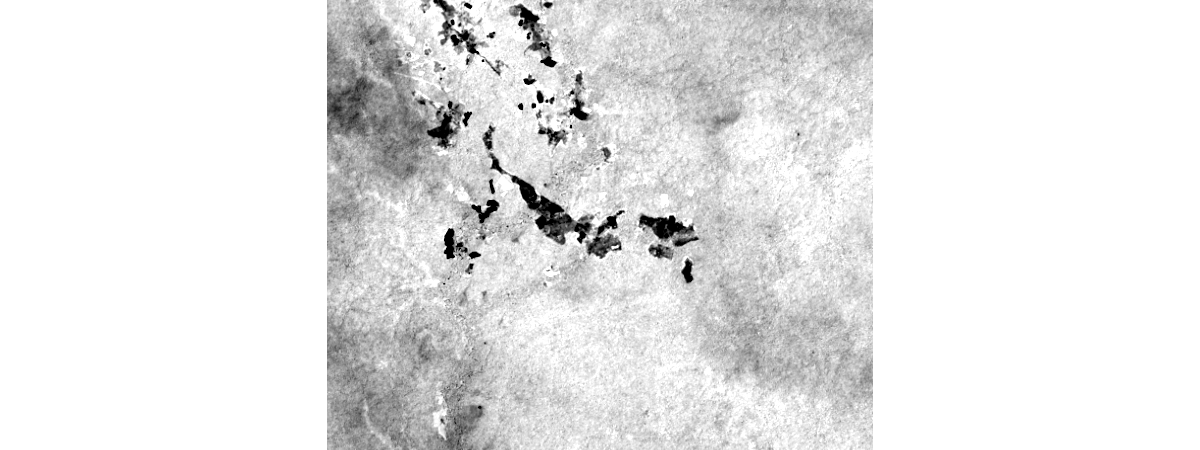

In [137]:
ndvi_2016 = clip(band_arithmetic(raster2016, "(b5 - b4) / (b5 + b4)"),aoi)
ndvi_2016

In [138]:
ndvi_dif=ndvi_2016-ndvi_2019

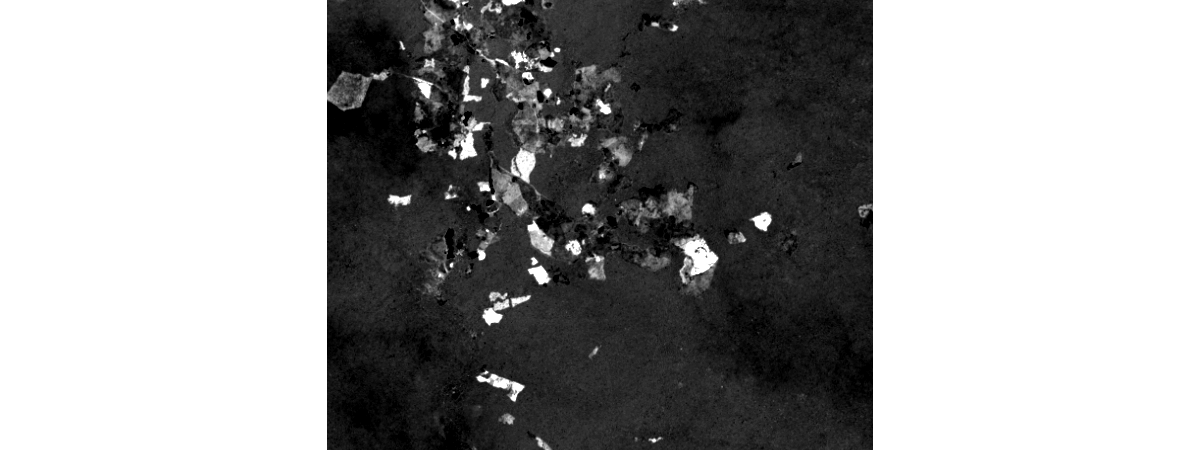

In [139]:
ndvi_dif

In [178]:
publicada = Diffar.save(output_name='Raster veinte', for_viz=True, gis = gis)
publicada

<Item title:"Raster veinte" type:Imagery Layer owner:rcmartinb>

In [144]:
Diffar = colormap(remap(ndvi_dif,
                             input_ranges=[0.1,  0.27,  # Valores a confirmar
                                           0.27, 0.44,  
                                           0.44, 0.66,  
                                           0.66, 1.00], 
                             output_values=[1, 2, 3, 4],                    
                             no_data_ranges=[-1, 0.1], astype='u8'), 
                       colormap=[[4, 0xFF, 0xC3, 0], [3, 0xFA, 0x8E, 0], [2, 0xF2, 0x55, 0], [1, 0xE6, 0,    0]])

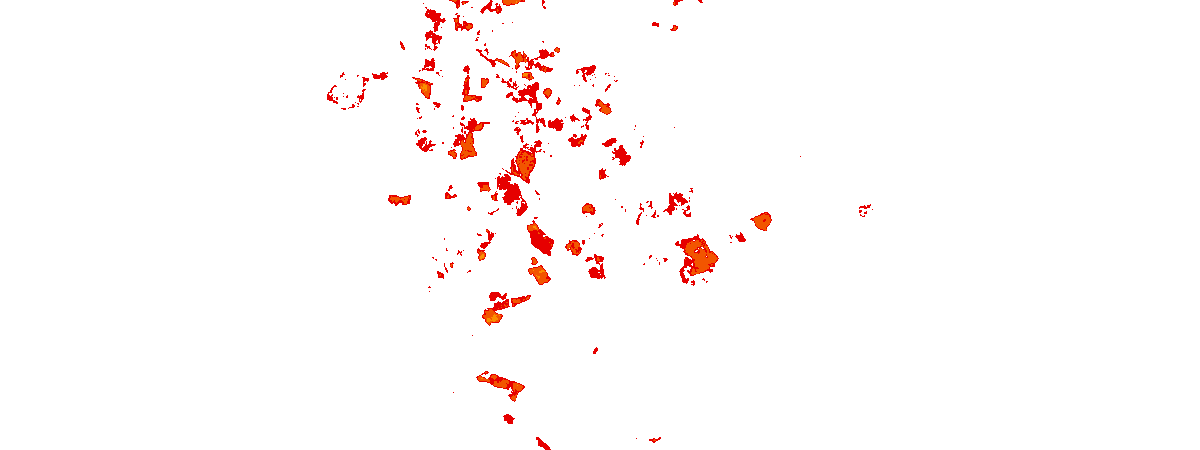

In [145]:
Diffar

In [ ]:
imagen2019 = stretch(extract_band(clip2019,[6,5,4]), 
                    stretch_type='StdDev',num_stddev=2.5, dra=True) 
imagen2019

In [179]:
m = gis.map()
m.center = [1.4223, -73.9301]  
m.zoom = 12
m.basemap = 'satellite'
m.add_layer(Diffar)
m

MapView(layout=Layout(height='400px', width='100%'), zoom=12.0)

In [174]:
res = Diffar.compute_histograms(aoi)

numpix = 0
histogram = res['histograms'][0]['counts'][0:]
for i in histogram:
    numpix += i

In [180]:
from IPython.display import HTML
sqmarea = numpix * 30 * 30 # in sq. m
has = sqmarea/10000   # in acres

HTML('<h1>Se perdieron <i>{:,} hectareas </i> desde {} hasta el {}</h1>.'.format(int(has), df.iloc[0]['AcquisitionDate'].date(),df.iloc[-1]['AcquisitionDate'].date()))

(-1.1013651874332706,
 1.1000650089253938,
 -1.1014901169387157,
 1.1000747886220583)

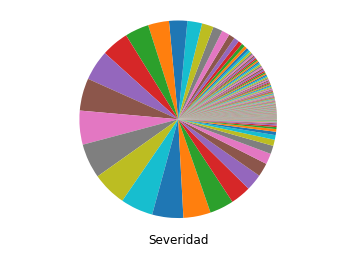

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
ndvihist = ndvi2019.compute_histograms(aoi)
histogram = ndvihist['histograms'][0]['counts'][0:]
plt.title('Severidad', y=-0.1)
plt.pie(histogram);
plt.axis('equal')